In [2]:
cpuTimes= [ 0.644 , 1.896 , 2.218]
gpuTimes=[ 13.638, 18.366 , 22.010 ]
stencilTimes=[21.528,26.841,33.791]
convTimes=[18.048 ,24.692 , 2.784]



<Figure size 432x288 with 0 Axes>

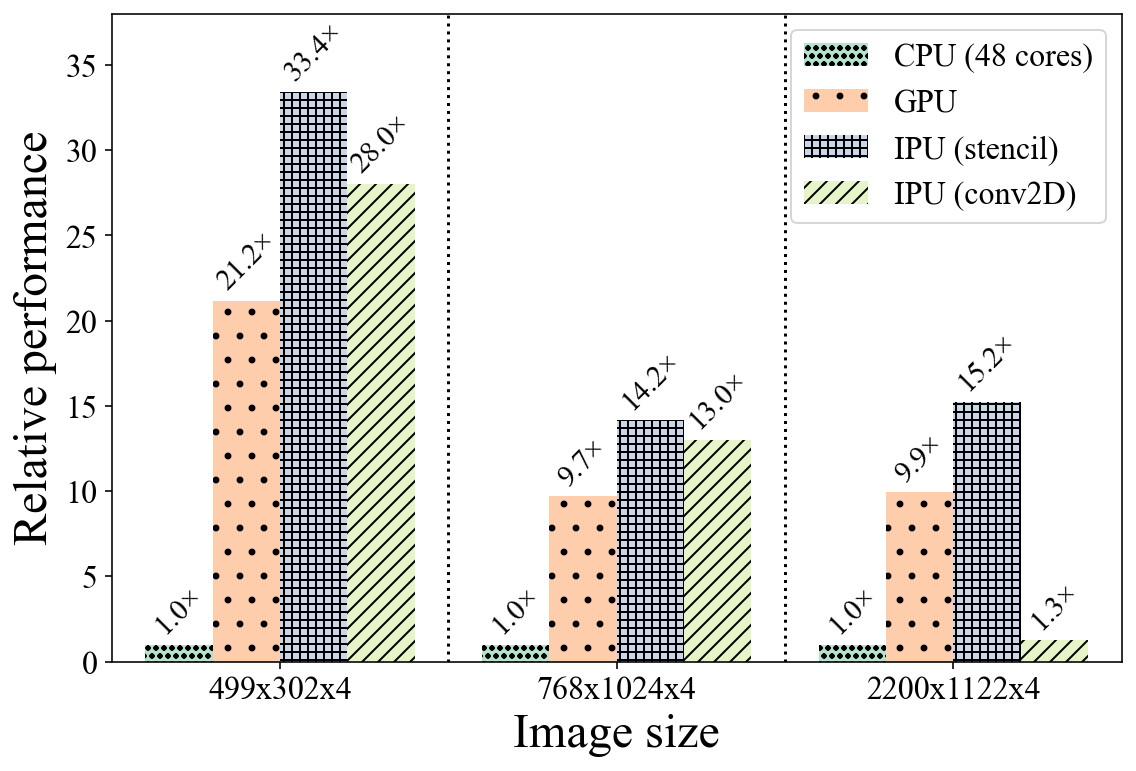

In [114]:
# Gaussian blur, platform relative
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from palettable.colorbrewer.qualitative import Dark2_7
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.set_cmap('Pastel1')

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = 'False'

labels = ['499x302x4', '768x1024x4', '2200x1122x4']

slowest=[ 0.644,1.896, 2.218]

cpuTimes= [ 0.644/slowest[0] , 1.896/slowest[1] , 2.218/slowest[2]]
gpuTimes=[ 13.638/slowest[0], 18.366/slowest[1] , 22.010/slowest[2] ]
stencilTimes=[21.528/slowest[0],26.841/slowest[1],33.791/slowest[2]]
convTimes=[18.048/slowest[0] ,24.692/slowest[1] , 2.784/slowest[2]]


x = np.arange(len(labels))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots( 1,1, figsize=(8,5.5))
cmap = plt.get_cmap("Pastel2")
rects1 = ax.bar(x -2*width/4+width/8, cpuTimes, width/4, label='CPU (48 cores)',color=cmap(0), hatch='ooo')
rects2 = ax.bar(x - width/4+width/8, gpuTimes, width/4, label='GPU',color=cmap(1), hatch='.')
rects3 = ax.bar(x+width/8, stencilTimes, width/4, label='IPU (stencil)',color=cmap(2), hatch='+++')
rects4 = ax.bar(x + width/4+width/8, convTimes, width/4, label='IPU (conv2D)',color=cmap(4), hatch='///')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative performance', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Image size', fontsize=24)
ax.set_xlim(-0.5,2.5)
MAXY=38
ax.set_ylim(0,MAXY)

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.1f}×'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=15, rotation=45)


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.plot([0.5,0.5],[0,MAXY], 'k:')
ax.plot([1.5,1.5],[0,MAXY], 'k:')


fig.tight_layout()

plt.figure(fig.number)
plt.savefig('/tmp/gaussian-blur-relative.png', dpi=150)
plt.show()


In [47]:
!pip install palettable

<Figure size 432x288 with 0 Axes>

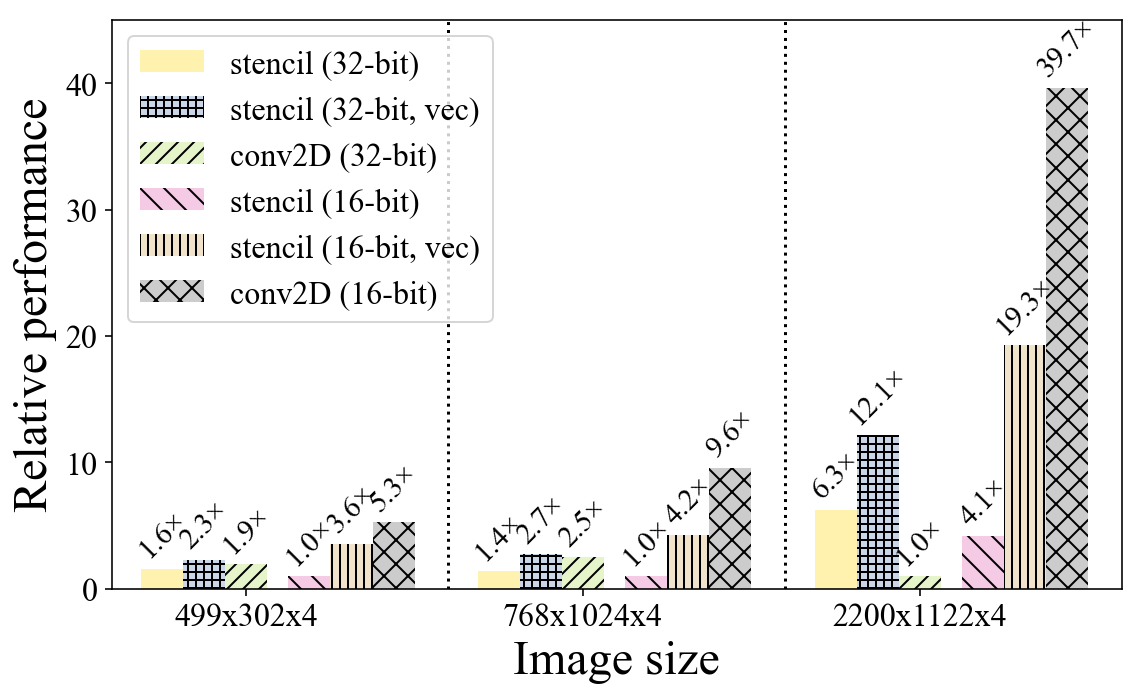

In [117]:
# Gaussian Blur, vectorisation etc.
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from palettable.colorbrewer.qualitative import Dark2_7
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.set_cmap('Accent')

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = 'False'

labels = ['499x302x4', '768x1024x4', '2200x1122x4']

slowest=[3.214, 15.87, 177.31]

floatTimes= [1/x for x in [ 2.05/slowest[0] , 11.62/slowest[1] , 28.36/slowest[2]]]
float2Times=[1/x for x in [ 1.4/slowest[0], 5.86/slowest[1] , 14.61/slowest[2] ]]
halfTimes=[1/x for x in [ 3.214/slowest[0], 15.87/slowest[1] , 42.73/slowest[2] ]]
half4Times=[1/x for x in [0.9/slowest[0],3.74/slowest[1],9.2/slowest[2]]]
floatConvTimes=[1/x for x in [1.67/slowest[0] ,6.37/slowest[1] , 177.31/slowest[2]]]
halfConvTimes=[1/x for x in [0.61/slowest[0] ,1.66/slowest[1] , 4.47/slowest[2]]]

x = np.arange(len(labels))  # the label locations
width = 0.5/4  # the width of the bars

fig, ax = plt.subplots( 1,1, figsize=(8,5))
rects1 = ax.bar(x -2*width, floatTimes, width, label='stencil (32-bit)',color=cmap(5), hatch='=')
rects2 = ax.bar(x - width, float2Times, width, label='stencil (32-bit, vec)',color=cmap(2), hatch='+++')
rects4 = ax.bar(x , floatConvTimes, width, label='conv2D (32-bit)',color=cmap(4), hatch='///')
rects3a = ax.bar(x+ width + width/2, halfTimes, width, label='stencil (16-bit)',color=cmap(3), hatch='\\\\')
rects3 = ax.bar(x+ 2*width + width/2, half4Times, width, label='stencil (16-bit, vec)',color=cmap(6), hatch='|||')
rects5 = ax.bar(x + 3*width + width/2, halfConvTimes, width, label='conv2D (16-bit)',color=cmap(8), hatch='xx')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative performance', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=16, loc='upper left')
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Image size', fontsize=24)
ax.set_xlim(-.4,2.6)
MAXY=45
ax.set_ylim(0,MAXY)

autolabel(rects1)
autolabel(rects2)
autolabel(rects4)
autolabel(rects3a)
autolabel(rects3)
autolabel(rects5)

ax.plot([0.6,0.6],[0,MAXY], 'k:')
ax.plot([1.6,1.6],[0,MAXY], 'k:')



fig.tight_layout()

plt.figure(fig.number)
plt.savefig('/tmp/gaussian-blur-precision-and-vec.png', dpi=150)
plt.show()


<Figure size 432x288 with 0 Axes>

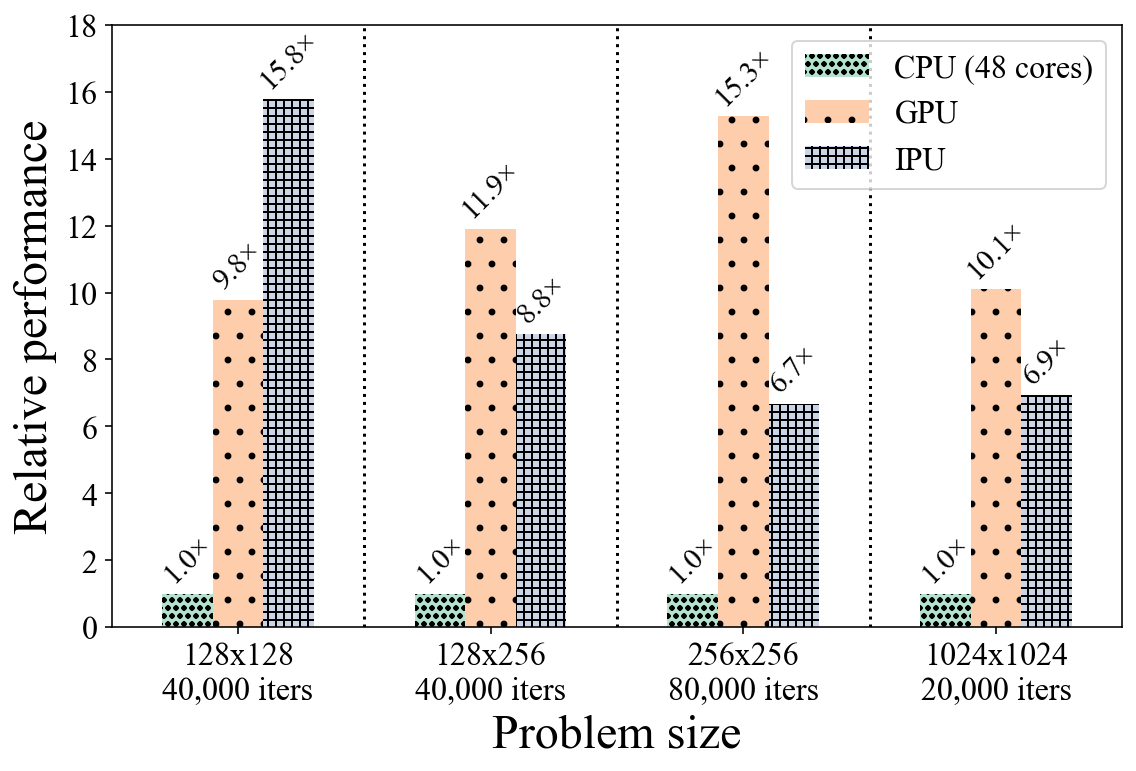

In [129]:
# LBM, platform relative
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from palettable.colorbrewer.qualitative import Dark2_7
%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.set_cmap('Pastel1')

mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = 'False'

labels = ['128x128\n40,000 iters', '128x256\n40,000 iters', '256x256\n80,000 iters', '1024x1024\n20,000 iters']

#  \textit{Platform} & \multicolumn{2}{c|}{\textit{128x128,40000 iters}} &
#      \multicolumn{2}{c|}{\textit{128x256,40000 iters}} & \multicolumn{2}{c|}{\textit{256x256,80000 iters}} &\multicolumn{2}{c|}{\textit{1024x1024,20000 iters}} \\ \cline{2-9}
#          & \textit{Speedup} & \textit{GLUP/s} & \textit{Speedup} & \textit{GLUP/s} & \textit{Speedup} & \textit{GLUP/s} & \textit{Speedup} & \textit{GLUP/s}\\ \hline
#      CPU (OpenCL) & 7.2x & 0.228 &  13.0x & 0.355 & 18.1x & 0.478 & 42.7x & 1.006\\
#      GPU (OpenCL) & 69.7x & 2.231 & \textbf{154.4x}  & \textbf{4.228} & \textbf{276.2x} &\textbf{7.304} & \textbf{431.6x} & \textbf{10.154}\\
#      IPU (Poplar) & \textbf{112.5x} & \textbf{3.599} & 113.5x & 3.109 & 129.8x &3.193 & 296.3x & 6.970\\

    
slowest = [0.228, 0.355,0.478,1.006]
cpuTimes= [0.228/slowest[0] , 0.355/slowest[1] , 0.478/slowest[2], 1.006/slowest[3]]
gpuTimes=[ 2.231/slowest[0], 4.228/slowest[1] , 7.304/slowest[2],10.154/slowest[3]]
ipuTimes=[3.599/slowest[0] ,3.109/slowest[1] , 3.193/slowest[2],6.970/slowest[3]]

x = np.arange(len(labels))  # the label locations
width = 0.2# the width of the bars

fig, ax = plt.subplots( 1,1, figsize=(8,5.5))
cmap = plt.get_cmap("Pastel2")
rects1 = ax.bar(x -width, cpuTimes, width, label='CPU (48 cores)',color=cmap(0), hatch='ooo')
rects2 = ax.bar(x, gpuTimes, width, label='GPU',color=cmap(1), hatch='.')
rects3 = ax.bar(x+ width, ipuTimes, width, label='IPU',color=cmap(2), hatch='+++')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative performance', fontsize=24)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)
ax.set_xlabel('Problem size', fontsize=24)
ax.set_xlim(-.5,3.5)
MAXY=18
ax.set_ylim(0,MAXY)


ax.plot([1-2*width-width/2,1-2*width-width/2],[0,MAXY], 'k:')
ax.plot([2-2*width-width/2,2-2*width-width/2],[0,MAXY], 'k:')
ax.plot([3-2*width-width/2,3-2*width-width/2],[0,MAXY], 'k:')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.figure(fig.number)
plt.savefig('/tmp/lbm-relative.png', dpi=150)
plt.show()